## Ejemplo 3: Gráficas de dispersión

### 1. Objetivos:
    - Aprender a realizar gráficas de dispersión
 
---
    
### 2. Desarrollo:

Las gráficas de dispersión, como ya viste en los ejemplos anteriores, nos ayudan a visualizar la relación entre dos variables numéricas. Veamos unos ejemplos:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../Datasets/diabetes-clean.csv', index_col=0)

In [4]:
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Vimos que insulina y glucosa tenían una correlación positiva de 0.33. Esta correlación lineal es bastante débil en realidad. Así se ven ambas variables en una gráfica de dispersión:

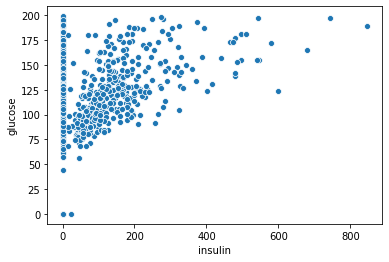

In [5]:
sns.scatterplot(df['insulin'], df['glucose'])

In [69]:
df['insulin'].corr(df['glucose'])

0.33135710992020945

Podemos ver algo curioso en esta gráfica: En el valor `0` de 'insulin', podemos observar que los valores 'glucose' encontrados abarcan todo el rango posible. Esto es algo extraño. A menos que uno de ustedes sea doctor y sepa que esto tiene sentido, creo que podríamos elaborar la hipótesis de que los valores `0` en 'insulin' representan una falta de datos o un error de medición y no un valor real. Esta hipótesis la podemos elaborar simplemente al observar que la gráfica tiene una anomalía en ese lugar. Veamos qué pasa si removemos los valores `0` en 'insulin':

In [56]:
df_no_zeros = df[df['insulin'] > 0]

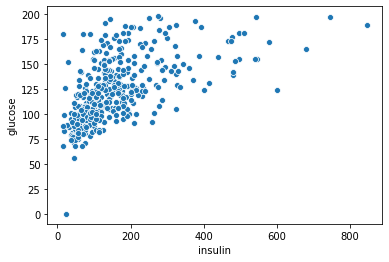

In [13]:
sns.scatterplot(df_no_zeros['insulin'], df_no_zeros['glucose'])

In [14]:
df_no_zeros['insulin'].corr(df_no_zeros['glucose'])

0.5800099317152833

Interesante, ¿no crees? Obviamente para realizar una hipótesis coherente necesitaríamos ser médicos (si alguien es médico aquí, por favor demuestre que hemos cometido un grave error), pero como puedes ver, tan sólo con visualizar la relación entre estos dos datos ya vimos algunas preguntas emerger.

---

Veamos qué hay entre las variables 'bmi' y 'glucose':

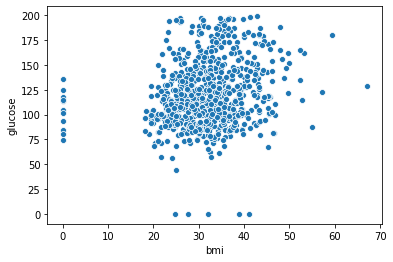

In [37]:
sns.scatterplot(df['bmi'], df['glucose'])

In [38]:
df['bmi'].corr(df['glucose'])

0.221071069458983

Otra vez tenemos este fenómeno extraño donde hay algunos valores en `0` que seguramente están ahí por error. También vamos a realizar una pequeña apuesta y eliminar algunos valores de 'bmi' que parecen ser atípicos. Veamos cómo cambia nuestra gráfica:

In [39]:
bmi_greater_than_zero = (df['bmi'] > 0) & (df['bmi'] < 55)
glucose_greater_than_zero = df['glucose'] > 0
df_no_zeros_2 = df[bmi_greater_than_zero & glucose_greater_than_zero]

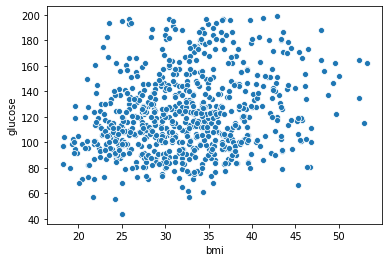

In [40]:
sns.scatterplot(df_no_zeros_2['bmi'], df_no_zeros_2['glucose'])

In [41]:
df_no_zeros_2['bmi'].corr(df_no_zeros_2['glucose'])

0.23706994033365764

En este caso nuestro coeficiente de correlación mejoró pero no mucho. Es notable que la relación entre estas dos variables es bastante débil (si es que existe).

---

Vamos a revisar 'insulin' y 'skin_thickness' que tuvieron un coeficiente de 0.44:

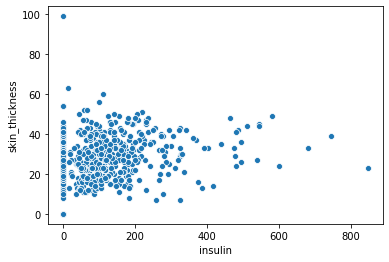

In [59]:
sns.scatterplot(df['insulin'], df['skin_thickness'])

In [60]:
df['insulin'].corr(df['skin_thickness'])

0.43678257012001387

Ya sabemos que insulin tiene valores `0` que probablemente sean erróneos, así que usaremos nuestro DataFrame `df_no_zeros` para eliminarlos:

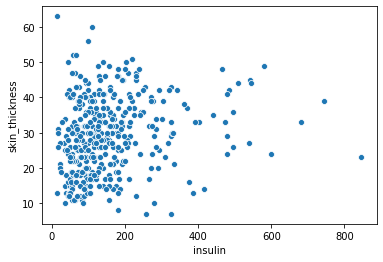

In [62]:
sns.scatterplot(df_no_zeros['insulin'], df_no_zeros['skin_thickness'])

In [63]:
df_no_zeros['insulin'].corr(df_no_zeros['skin_thickness'])

0.18488842018975898

¡¿Qué ha pasado aquí?! Un coeficiente de 0.4367 disminuyó a 0.1848 cuando eliminamos algunos valores que creemos son erróneos. Esto es una gran demostración de cómo nunca podemos confiar en una sola medida para realizar nuestras hipótesis. Con este dataset la verdad es que estamos explorando un poco a ciegas porque se requiere de conocimientos muy especializados para entender qué está pasando en realidad, pero resulta interesante que aún sin saber exactamente qué significan las variables, de todas maneras podemos encontrar comportamientos que generan muchas preguntas.

Otra pregunta que me interesa plantearme es si acaso la relación entre estas dos variables podría mejorar si eliminamos los valores atípicos de 'insulin':

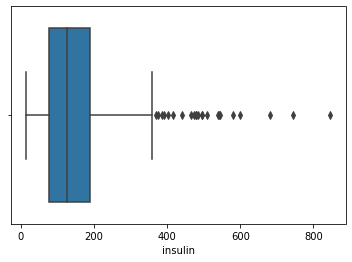

In [64]:
sns.boxplot(df_no_zeros['insulin'])

In [65]:
iqr_insulin = df_no_zeros['insulin'].quantile(0.75) - df_no_zeros['insulin'].quantile(0.25)
filter_upper_outliers = df_no_zeros['insulin'] < (df_no_zeros['insulin'].quantile(0.75) + iqr_insulin * 1.5)
df_insulin_no_outliers = df_no_zeros[filter_upper_outliers]

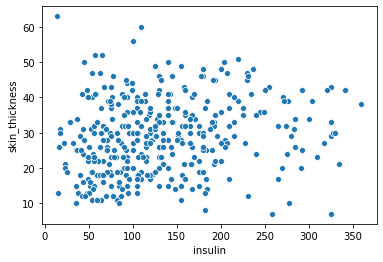

In [67]:
sns.scatterplot(df_insulin_no_outliers['insulin'], df_insulin_no_outliers['skin_thickness'])

In [68]:
df_insulin_no_outliers['insulin'].corr(df_insulin_no_outliers['skin_thickness'])

0.18403514086196654

Después de este procedimiento quedo bastante convencido de que la correlación positiva que habíamos encontrado anteriormente no era real. Ojalá y esto haya sido una demostración del cuidado que debemos de tener al explorar nuestras variables y las relaciones entre ellas.